# Inaugural Project

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

The model is solved by first setting up the model itself, then calculating the initial utility for the two agents, and then calculating all possible changes and only displaying the Pareto improvements.

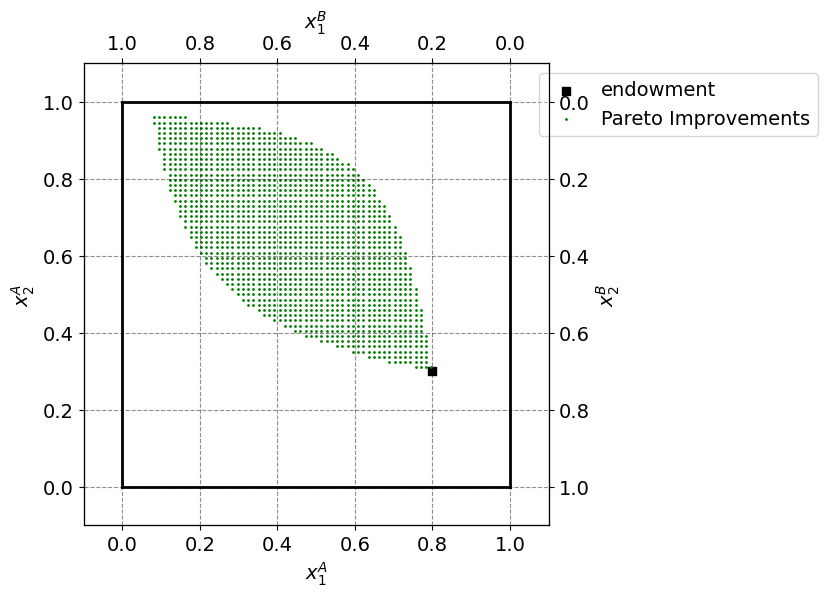

In [3]:
# code for solving the model (remember documentation and comments)

from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

# calculate initial utility

initial_utility_A = model.utility_A(model.par.w1A, model.par.w2A)
initial_utility_B = model.utility_B(x1B = (1-model.par.w1A), x2B = (1-model.par.w2A))

# calculate all pareto improvements

N = 75
x_A1_range = np.linspace(0, 1, N)
x_A2_range = np.linspace(0, 1, N)
C_x_A1, C_x_A2 = np.meshgrid(x_A1_range, x_A2_range)


pareto_mask = (model.utility_A(C_x_A1, C_x_A2) >= initial_utility_A) & (model.utility_B(1-C_x_A1, 1-C_x_A2) >= initial_utility_B)

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(C_x_A1[pareto_mask], C_x_A2[pareto_mask], color='green', s=1, label='Pareto Improvements')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


# Question 2

I first define the range of values to iterate over, and then define two empty lists that will store the errors.

I then create an iterative loop for p1 in the range defined and append the results to the empty lists. I then make a figure where I plot the values of the two lists.

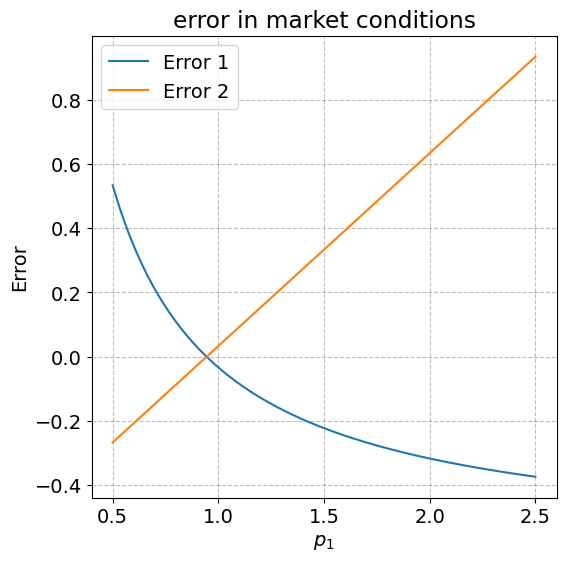

In [4]:
# initializing calculations and definitions
N = 75
P1 = np.linspace(0.5, 2.5, N)

# empty lists for errors
error1 = []
error2 = []

# iterating for errors and appending them to the empty list
for p1 in P1:
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)

    eps1 = x1A-par.w1A + x1B-(1-par.w1A)
    eps2 = x2A-par.w2A + x2B-(1-par.w2A)
    
    error1.append(eps1)
    error2.append(eps2)

# creating figure and displaying
plt.figure(figsize=(6, 6))
plt.plot(P1, error1, label='Error 1')
plt.plot(P1, error2, label='Error 2')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('error in market conditions')
plt.grid(True)
plt.legend()
plt.show()    

# Question 3

I first define the minimum error, defined as the sum of the two errors, and then define the market clearing price, *market_clearing_price*, as the price where the minimum error is found.

In [5]:
# calculations for minimizing error to determine the market clearing price
min_error = np.argmin(np.abs(np.array(error1)) + np.abs(np.array(error2)))


market_clearing_price = P1[min_error]

# Printing the market clearing price
print(f"Market clearing price is {market_clearing_price:.3f}.")


Market clearing price is 0.932.


# Question 4A

In [25]:
# Create an empty list for utilities
util_list = []


# Iterative loop for p1
for p1 in P1:
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)
    utility_A = model.utility_A(x1A=(1-x1B), x2A=(1-x2B))

    util_list.append(utility_A)

# Utility maximization for A
A_max = np.argmax(util_list)
optimal_price = P1[A_max]
print(f"optimal price is {optimal_price:}")


optimal price is 1.9054054054054055


In [27]:
import pandas as pd
# Create an empty list for utilities
util_list2 = []
P1_new = np.linspace(0.001, 1000, 10000)

# Iterative loop for p1
for p1 in P1_new:
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)
    utility_A = model.utility_A(x1A=(1-x1B), x2A=(1-x2B))

    util_list2.append(utility_A)

# Utility maximization for A

A_max = np.argmax(util_list2)
optimal_price = P1_new[A_max]
print(f"optimal price is {optimal_price:.3f}")


optimal price is 1.901


# Question 5a

I first initiate two empty lists to store the values for x1A and x2A. I then define the Pareto improvements (the set C). I then create a loop for x1A and x2A and only include values where there is a Pareto improvement. These values are added to the lists.

Then I print out the lists as dataframes (for easier reading) and read the maximum values to compute the utility for A.

In [18]:
import pandas as pd
x1A_value = []
x2A_value =[]

def pareto_improvement(x1A, x2A):
    return (model.utility_A(x1A, x2A) >= initial_utility_A) and (model.utility_B(1-x1A, 1-x2A) >= initial_utility_B)

A_max = -np.inf
for x1A in x_A1_range:
    for x2A in x_A2_range:
        if pareto_improvement(x1A, x2A):
            A_utility = model.utility_A(x1A, x2A)
            if A_utility >= A_max:
                x1A_value.append(x1A)
                x2A_value.append(x2A)

df = pd.DataFrame(x1A_value)
print(df)
df2 = pd.DataFrame(x2A_value)
print(df2)


             0
0     0.081081
1     0.081081
2     0.094595
3     0.094595
4     0.094595
...        ...
1538  0.783784
1539  0.783784
1540  0.783784
1541  0.783784
1542  0.797297

[1543 rows x 1 columns]
             0
0     0.945946
1     0.959459
2     0.878378
3     0.891892
4     0.905405
...        ...
1538  0.351351
1539  0.364865
1540  0.378378
1541  0.391892
1542  0.310811

[1543 rows x 1 columns]


In [15]:
model.utility_A(x1A=0.797, x2A=0.311)

0.42559158583872597

# Question 6A

In [8]:
from scipy.optimize import minimize
# We deine the social planners problem
def social_planners_problem(x):
    x1, x2 = x
    return -(model.utility_A(x1, x2) + model.utility_B(1 - x1, 1 - x2))

bounds = [(0, 1), (0, 1)]

initial_guess = [0.3, 0.2]

# We maximize by minimizing the negative utility
social_plan_opt_A = minimize(social_planners_problem, initial_guess, bounds=bounds)

optimal_for_A1 = social_plan_opt_A.x[0]
optimal_for_A2 = social_plan_opt_A.x[1]


print("Optimal allocation for A is:", social_plan_opt_A.x)
print("Optimal allocation for B is:", [1-optimal_for_A1], [1-optimal_for_A2])

Optimal allocation for A is: [0.33332746 0.66666294]
Optimal allocation for B is: [0.6666725384328647] [0.33333705534346836]


# Question 6B

To sum up, we have three different scenarios. The first is for A to set the prices to only maximize their own utility and not take B's utility into account.

The second is for A to be the market maker, where they have to choose x1 and x2 so that B is no worse off, i.e. only Pareto improvements. 

The third is the case where there is a utalitarian social planner, that focuses on aggragate utility.

With regards to equality (or lack thereof), it is clear that these three cases are listed from potentially most unequal to most equal. Since A will completely disregard B's utility in the first case, they will simply maximize their own. In the second case, A is restricted to only choosing Pareto improvements, and for the third case, this will likely be the most equal since they have the same type of utility functions (Cobb-Douglas).

The pros of the first case is that it is the easiest to solve for, since we only focus on one persons utility. The obvious con is that it is very unequal.

The pros of the second case is that we make sure to leave both people at least as good off as they were originally, which is a big improvement compared to the first case. The con is that A will obviously still be better off than B, since they are the market maker.

For the third case, this is the most holistic approach, where we focus on maximizing the aggregate utility. A drawback of this approach is that if the two people have very different utility functions, this might leave one person worse off.



# Question 7

This is a simple simulation, showing 50 drawings from a uniform distribution for each endowment

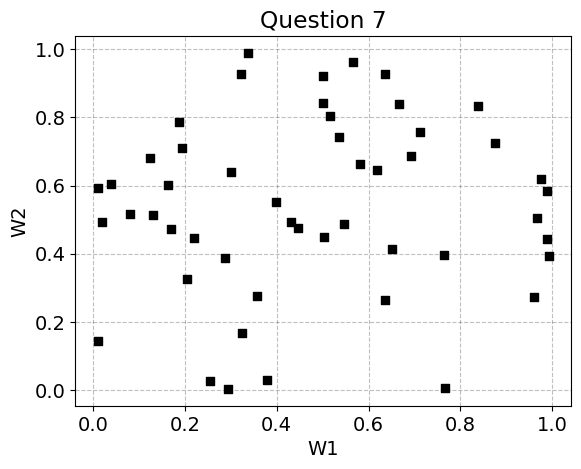

In [9]:
np.random.seed(60)

W1 = np.random.uniform(0, 1, 50)
W2 = np.random.uniform(0, 1, 50)
plt.scatter(W1, W2, color='black', marker='s', alpha=1)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Question 7')
plt.show()



# Question 8

To solve this, I would do the following (in pseudocode):

In [ ]:
# create empty equilibrium_list
# define equilibrium_allocation(W1, W2):
    # insert function for market clearing (probably from question 2)

# for W1, W2 in W do*
    # return equilibrium(W1, W2)
    # add to equilibrium_list

# plot equilibrium_list